In [126]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('fivethirtyeight')
from sklearn.tree import DecisionTreeClassifier as DTC

In [127]:
train = pd.read_csv("/Users/happycatcat523/pyworks/kaggle資料/titanic/train.csv")
test = pd.read_csv("/Users/happycatcat523/pyworks/kaggle資料/titanic/test.csv")

In [128]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [129]:
test.sample(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
402,1294,1,"Gibson, Miss. Dorothy Winifred",female,22.0,0,1,112378,59.4000,NaN,C
376,1268,3,"Kink, Miss. Maria",female,22.0,2,0,315152,8.6625,NaN,S
168,1060,1,"Cassebeer, Mrs. Henry Arthur Jr (Eleanor Genev...",female,NaN,0,0,17770,27.7208,NaN,C
96,988,1,"Cavendish, Mrs. Tyrell William (Julia Florence...",female,76.0,1,0,19877,78.8500,C46,S
259,1151,3,"Midtsjo, Mr. Karl Albert",male,21.0,0,0,345501,7.7750,NaN,S
391,1283,1,"Lines, Mrs. Ernest H (Elizabeth Lindsey James)",female,51.0,0,1,PC 17592,39.4000,D28,S
207,1099,2,"Collett, Mr. Sidney C Stuart",male,24.0,0,0,28034,10.5000,NaN,S
237,1129,3,"Baccos, Mr. Raffull",male,20.0,0,0,2679,7.2250,NaN,C
332,1224,3,"Thomas, Mr. Tannous",male,NaN,0,0,2684,7.2250,NaN,C
153,1045,3,"Klasen, Mrs. (Hulda Kristina Eugenia Lofqvist)",female,36.0,0,2,350405,12.1833,NaN,S


In [130]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [131]:
train['Embarked'] = train['Embarked'].fillna('S')
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [132]:
dummy_train = pd.get_dummies(train[['Sex', 'Embarked']])
train_two = pd.concat([train.drop(['Sex', 'Embarked'], axis = 1), dummy_train], axis = 1)
train_two = train_two.drop('Sex_female', axis = 1)
train_two.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Sex_male         0
Embarked_C       0
Embarked_Q       0
Embarked_S       0
dtype: int64

In [133]:
train_three = train_two.drop(['PassengerId', 'Name', 'Cabin', 'Ticket'], axis = 1)
train_three.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_C,Embarked_Q,Embarked_S
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,-0.543351,0.168240,0.003650,-0.149683
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,0.131900,-0.243292,0.221009,0.074053
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,0.093254,0.036261,-0.022405,-0.023233
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,-0.114631,-0.059528,-0.026354,0.068734
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,-0.245489,-0.011069,-0.081228,0.060814
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,-0.182333,0.269335,-0.117216,-0.162184
Sex_male,-0.543351,0.131900,0.093254,-0.114631,-0.245489,-0.182333,1.000000,-0.082853,-0.074115,0.119224
Embarked_C,0.168240,-0.243292,0.036261,-0.059528,-0.011069,0.269335,-0.082853,1.000000,-0.148258,-0.782742
Embarked_Q,0.003650,0.221009,-0.022405,-0.026354,-0.081228,-0.117216,-0.074115,-0.148258,1.000000,-0.499421
Embarked_S,-0.149683,0.074053,-0.023233,0.068734,0.060814,-0.162184,0.119224,-0.782742,-0.499421,1.000000


In [134]:
train_three.isnull().sum()

Survived        0
Pclass          0
Age           177
SibSp           0
Parch           0
Fare            0
Sex_male        0
Embarked_C      0
Embarked_Q      0
Embarked_S      0
dtype: int64

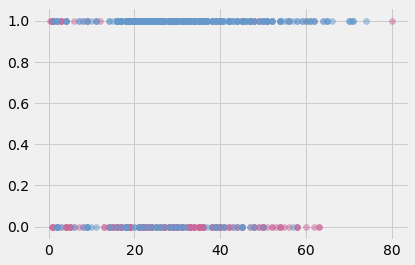

In [135]:
train_sur = train_three[train_three.Survived == 1]
train_sur_age = train_sur.iloc[:,2]
train_sur_s = train_sur.iloc[:,6]
plt.scatter(train_sur_age,train_sur_s,color="#cc6699",alpha = 0.5)

train_sur = train_three[train_three.Survived == 0]
train_sur_age = train_sur.iloc[:,2]
train_sur_s = train_sur.iloc[:,6]
plt.scatter(train_sur_age, train_sur_s,color="#6699cc",alpha=0.5)

plt.show()

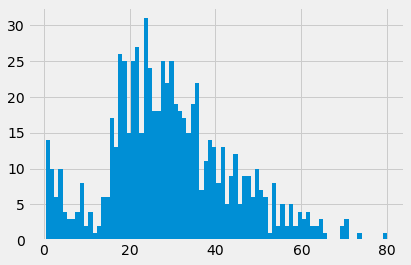

In [136]:
max_age = train_three['Age'].max()
train_three['Age'].hist(bins = int(max_age))

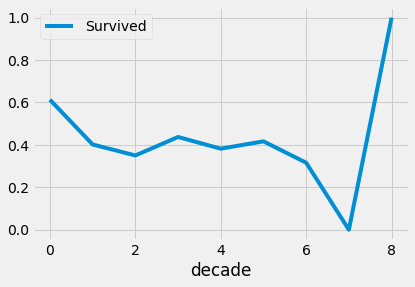

In [137]:
train_three['decade'] = train_three['Age'].dropna().apply(lambda x: int(x / 10))
train_three[['decade', 'Survived']].groupby('decade').mean().plot()

In [138]:
train_three['Age'] = train_three['Age'].fillna(train_three['Age'].mean())
train_three.isnull().sum()

Survived        0
Pclass          0
Age             0
SibSp           0
Parch           0
Fare            0
Sex_male        0
Embarked_C      0
Embarked_Q      0
Embarked_S      0
decade        177
dtype: int64

In [139]:
train_four = train_three.drop(['decade'], axis = 1)
train_four.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
Survived      891 non-null int64
Pclass        891 non-null int64
Age           891 non-null float64
SibSp         891 non-null int64
Parch         891 non-null int64
Fare          891 non-null float64
Sex_male      891 non-null uint8
Embarked_C    891 non-null uint8
Embarked_Q    891 non-null uint8
Embarked_S    891 non-null uint8
dtypes: float64(2), int64(4), uint8(4)
memory usage: 45.3 KB


In [140]:
X_train = train_four.drop('Survived', axis = 1)
y_train = train_four.Survived

In [141]:
classfier = DTC(max_depth = 2)
classfier.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [142]:
classfier.score(X_train, y_train)

0.7957351290684624

In [143]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [144]:
test['Age'] = test['Age'].fillna(test['Age'].median())
test['Fare'] = test['Fare'].fillna(test['Fare'].mean())
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

In [145]:
test_two = pd.get_dummies(test[['Sex', 'Embarked']])
test_two = test_two.drop(['Sex_female'], axis = 1)
test_two.head()

,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,1,0
1,0,0,0,1
2,1,0,1,0
3,1,0,0,1
4,0,0,0,1


In [146]:
train_four.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
Survived      891 non-null int64
Pclass        891 non-null int64
Age           891 non-null float64
SibSp         891 non-null int64
Parch         891 non-null int64
Fare          891 non-null float64
Sex_male      891 non-null uint8
Embarked_C    891 non-null uint8
Embarked_Q    891 non-null uint8
Embarked_S    891 non-null uint8
dtypes: float64(2), int64(4), uint8(4)
memory usage: 45.3 KB


In [147]:
test_three.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
Pclass        418 non-null int64
Age           418 non-null float64
SibSp         418 non-null int64
Parch         418 non-null int64
Fare          418 non-null float64
Sex_male      418 non-null uint8
Embarked_C    418 non-null uint8
Embarked_Q    418 non-null uint8
Embarked_S    418 non-null uint8
dtypes: float64(2), int64(3), uint8(4)
memory usage: 18.0 KB


In [148]:
test_three = pd.concat([test.drop(['Sex', 'Embarked','PassengerId', 'Name', 'Cabin', 'Ticket'], axis = 1),test_two], axis = 1)
test_three.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,34.5,0,0,7.8292,1,0,1,0
1,3,47.0,1,0,7.0000,0,0,0,1
2,2,62.0,0,0,9.6875,1,0,1,0
3,3,27.0,0,0,8.6625,1,0,0,1
4,3,22.0,1,1,12.2875,0,0,0,1


In [149]:
test_predict = classfier.predict(test_three)

In [152]:
PassengerId = np.array(test["PassengerId"]).astype(int)

In [153]:
decision_tree03 = pd.DataFrame(test_predict.astype(int), PassengerId, columns = ['Survived'])
decision_tree03.head()

,Survived
892,0
893,0
894,0
895,0
896,0


In [154]:
decision_tree03.to_csv('decision_tree03.csv', index_label = ["PassengerId"])